In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#loading the dataset

heart_failure = pd.read_csv('/content/sample_data/heart failur classification dataset.csv')
heart_failure.head()

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,75.0,0,582,0,20,1,265000.00,1.9,NaN,Male,No,4.0,1
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,Male,No,6.0,1
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.0,Male,Yes,7.0,1
3,3,50.0,1,111,0,20,0,210000.00,1.9,137.0,Male,No,7.0,1
4,4,65.0,1,160,1,20,0,327000.00,2.7,116.0,Female,No,8.0,1


In [ ]:
heart_failure.shape

(299, 14)

In [ ]:
#finding the missing values and handleing them

heart_failure.isnull().sum()

Unnamed: 0                  0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                6
sex                         0
smoking                     0
time                        7
DEATH_EVENT                 0
dtype: int64

In [ ]:

heart_failure[['serum_sodium','time']]

,serum_sodium,time
0,NaN,4.0
1,136.0,6.0
2,129.0,7.0
3,137.0,7.0
4,116.0,8.0
...,...,...
294,143.0,270.0
295,NaN,271.0
296,138.0,278.0
297,140.0,280.0


In [ ]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(heart_failure[['serum_sodium']])

heart_failure['serum_sodium'] = impute.transform(heart_failure[['serum_sodium']])

In [ ]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(heart_failure[['time']])

heart_failure['time'] = impute.transform(heart_failure[['time']])

In [ ]:
heart_failure.isnull().sum()

Unnamed: 0                  0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
#encoding categorical features

heart_failure['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
heart_failure['sex_enc'] = enc.fit_transform(heart_failure['sex'])
print(heart_failure[['sex', 'sex_enc']].head(5))

      sex  sex_enc
0    Male        1
1    Male        1
2    Male        1
3    Male        1
4  Female        0


In [ ]:
heart_failure = heart_failure.drop(['sex'], axis = 1)

In [ ]:
heart_failure

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,DEATH_EVENT,sex_enc
0,0,75.0,0,582,0,20,1,265000.00,1.9,136.675768,No,4.000000,1,1
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.000000,No,6.000000,1,1
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.000000,Yes,7.000000,1,1
3,3,50.0,1,111,0,20,0,210000.00,1.9,137.000000,No,7.000000,1,1
4,4,65.0,1,160,1,20,0,327000.00,2.7,116.000000,No,8.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,294,62.0,0,61,1,38,1,155000.00,1.1,143.000000,Yes,270.000000,0,1
295,295,55.0,0,1820,0,38,0,270000.00,1.2,136.675768,No,271.000000,0,0
296,296,45.0,0,2060,1,60,0,742000.00,0.8,138.000000,No,278.000000,0,0
297,297,45.0,0,2413,0,38,0,140000.00,1.4,140.000000,Yes,280.000000,0,1


In [ ]:
heart_failure['smoking'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
heart_failure['smoking_enc'] = enc.fit_transform(heart_failure['smoking'])
print(heart_failure[['smoking', 'smoking_enc']].head(10))

  smoking  smoking_enc
0      No            0
1      No            0
2     Yes            1
3      No            0
4      No            0
5     Yes            1
6      No            0
7     Yes            1
8      No            0
9     Yes            1


In [ ]:
heart_failure = heart_failure.drop(['smoking'], axis = 1)

In [ ]:
heart_failure

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT,sex_enc,smoking_enc
0,0,75.0,0,582,0,20,1,265000.00,1.9,136.675768,4.000000,1,1,0
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.000000,6.000000,1,1,0
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.000000,7.000000,1,1,1
3,3,50.0,1,111,0,20,0,210000.00,1.9,137.000000,7.000000,1,1,0
4,4,65.0,1,160,1,20,0,327000.00,2.7,116.000000,8.000000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,294,62.0,0,61,1,38,1,155000.00,1.1,143.000000,270.000000,0,1,1
295,295,55.0,0,1820,0,38,0,270000.00,1.2,136.675768,271.000000,0,0,0
296,296,45.0,0,2060,1,60,0,742000.00,0.8,138.000000,278.000000,0,0,0
297,297,45.0,0,2413,0,38,0,140000.00,1.4,140.000000,280.000000,0,1,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
#Prepare the training set

# X = feature values, all the columns except the last column
X = heart_failure.iloc[:, :-1]

# y = target values, last column of the data frame
y = heart_failure.iloc[:, -1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Train the model
model = LogisticRegression()
model.fit(x_train, y_train) 
#Training the model
predictions = model.predict(x_test)
print(predictions)
# printing predictions

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
Logistic_Regression_Accuracy=accuracy_score(y_test, predictions)
print(Logistic_Regression_Accuracy)

0.6333333333333333


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X = heart_failure.iloc[:,1:13]
y = heart_failure.iloc[:,13]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
Decision_Tree_accuracy=accuracy_score(y_pred,y_test)
print(Decision_Tree_accuracy)

0.6166666666666667


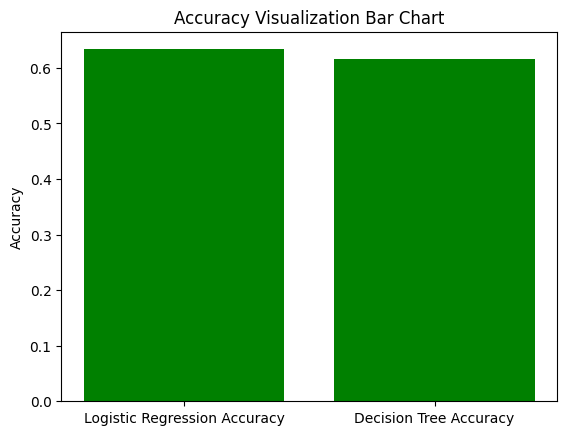

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Logistic Regression Accuracy', 'Decision Tree Accuracy')
y_pos = np.arange(len(objects))
performance = [Logistic_Regression_Accuracy,Decision_Tree_accuracy]

plt.bar(y_pos, performance, align='center', color ='Green')
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Accuracy Visualization Bar Chart')

plt.show()

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x_test, y_test)))
svcTrainingPrePCA=(svc.score(x_train, y_train))
svcTestingPrePCA=(svc.score(x_test, y_test))


Training accuracy of the model is 0.71
Testing accuracy of the model is 0.62


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test, y_test)))
rfcTrainingPrePCA=(rfc.score(x_train, y_train))
rfcTestingPrePCA=(rfc.score(x_test, y_test))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.53


In [ ]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)

In [ ]:
nnc.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=7, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x_test, y_test)))
nncTrainingPrePCA=(nnc.score(x_train, y_train))
nncTestingPrePCA=(nnc.score(x_test, y_test))

The Training accuracy of the model is 0.59
The Testing accuracy of the model is 0.58


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
# Performance of the KNN model when no dimensions are reduced
print("Training accuracy is {:.2f}".format(knn.score(x_train, y_train)) )
print("Testing accuracy is {:.2f} ".format(knn.score(x_test, y_test)) )

Training accuracy is 0.77
Testing accuracy is 0.53 


In [ ]:
#Prepare the training set

# X = feature values, all the columns except the last column
X = heart_failure.iloc[:, :-1]

# y = target values, last column of the data frame
y = heart_failure.iloc[:, -1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train_scaled = scaler.transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=7)

In [ ]:
principal_components= pca.fit_transform(heart_failure)
print(principal_components)

[[ 1.64196826e+03 -5.53604405e-02 -1.94979230e+02 ... -1.80563118e+01
   5.73036658e+00 -2.01805025e+00]
 [ 1.76536004e+00  7.27934217e+03 -1.85575256e+02 ...  2.71018324e+00
  -5.44472975e+00  2.08758380e+00]
 [-1.01358134e+05 -4.11050725e+02 -1.90469601e+02 ... -1.20048138e+01
  -6.62639943e-01  5.46235271e+00]
 ...
 [ 4.78642318e+05  1.36179771e+03  2.04739702e+02 ...  6.84420572e+00
  -1.88737637e+01  1.67754903e+00]
 [-1.23357579e+05  1.86091956e+03  2.14194717e+02 ... -1.36344456e+00
  -1.72837903e+01 -2.48216201e+00]
 [ 1.31641874e+05 -4.17920581e+02  1.10059736e+02 ...  6.19180680e+01
   7.68557275e+01  3.51314047e+00]]


In [ ]:
pca.explained_variance_ratio_

array([9.99900224e-01, 9.83520747e-05, 1.38055964e-06, 1.53401124e-08,
       1.38773818e-08, 1.15597034e-08, 1.89551006e-09])

In [ ]:
sum(pca.explained_variance_ratio_)

0.9999999997653279

In [ ]:
principal_df = pd.DataFrame(data=principal_components, columns=["principle component 1", "principle component 2","principle component 3","principle component 4","principle component 5","principle component 6", "principle component 7"])
#principal_df.head()
main_df=pd.concat([principal_df, heart_failure[["smoking_enc"]]], axis=1)

In [ ]:
main_df.head()

,principle component 1,principle component 2,principle component 3,principle component 4,principle component 5,principle component 6,principle component 7,smoking_enc
0,1641.968257,-0.055360,-194.979230,6.865390,-18.056312,5.730367,-2.018050,0
1,1.765360,7279.342165,-185.575256,-2.121702,2.710183,-5.444730,2.087584,0
2,-101358.134430,-411.050725,-190.469601,13.433466,-12.004814,-0.662640,5.462353,1
3,-53358.144228,-457.685067,-189.950076,22.667062,-2.253156,-6.960367,-2.259118,0
4,63641.864084,-437.103361,-190.302998,14.590856,-13.674164,1.158844,18.707797,0


In [ ]:
#Prepare the training set

# X = feature values, all the columns except the last column
X = main_df.iloc[:, :-1]

# y = target values, last column of the data frame
y = main_df.iloc[:, -1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x_test, y_test)))
svcTrainingPostPCA=(svc.score(x_train, y_train))
svcTestingPostPCA=(svc.score(x_test, y_test))

Training accuracy of the model is 0.65
Testing accuracy of the model is 0.58


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test, y_test)))
rfcTrainingPostPCA=(rfc.score(x_train, y_train))
rfcTestingPostPCA=(rfc.score(x_test, y_test))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.67


In [ ]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)

In [ ]:
nnc.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=7, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x_test, y_test)))
nncTrainingPostPCA=(nnc.score(x_train, y_train))
nncTestingPostPCA=(nnc.score(x_test, y_test))

The Training accuracy of the model is 0.59
The Testing accuracy of the model is 0.58


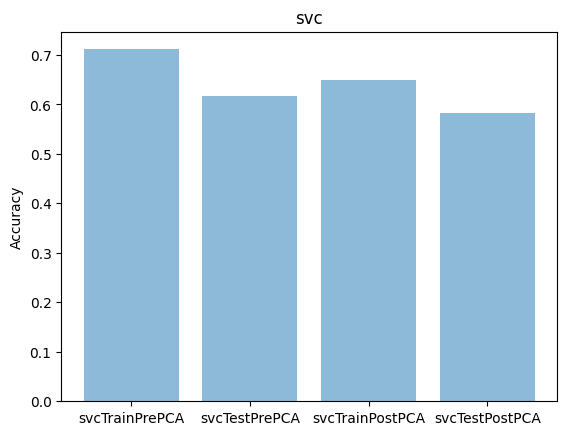

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('svcTrainPrePCA', 'svcTestPrePCA', 'svcTrainPostPCA', 'svcTestPostPCA')
y_pos = np.arange(len(objects))
performance = [svcTrainingPrePCA,svcTestingPrePCA,svcTrainingPostPCA,svcTestingPostPCA]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('svc')

plt.show()

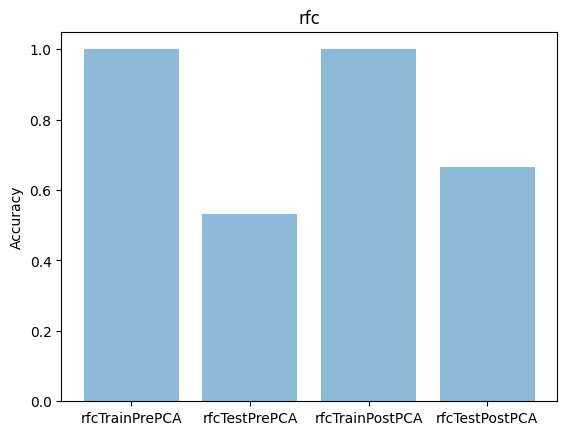

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('rfcTrainPrePCA', 'rfcTestPrePCA', 'rfcTrainPostPCA', 'rfcTestPostPCA')
y_pos = np.arange(len(objects))
performance = [rfcTrainingPrePCA,rfcTestingPrePCA,rfcTrainingPostPCA,rfcTestingPostPCA]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('rfc')

plt.show()

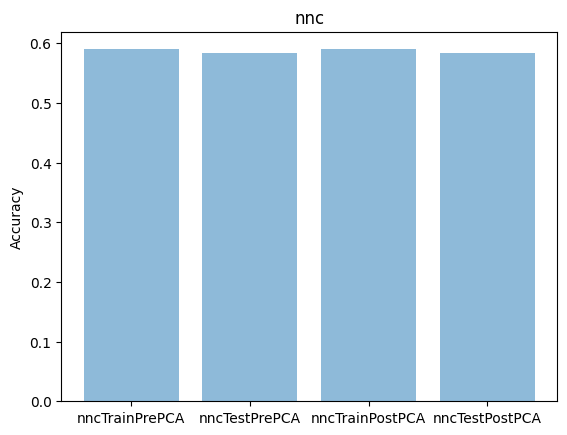

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('nncTrainPrePCA', 'nncTestPrePCA', 'nncTrainPostPCA', 'nncTestPostPCA')
y_pos = np.arange(len(objects))
performance = [nncTrainingPrePCA,nncTestingPrePCA,nncTrainingPostPCA,nncTestingPostPCA]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('nnc')

plt.show()